# Titanic Solution Using Speedml

### This notebook uses the [Speedml](https://speedml.com)  Python package to speed start machine learning projects.

Speedml integrates best ML packages and popular strategies used by top data scientists in an easy to use Python package.

> Using Speedml on Titanic dataset we **quickly jumped from low 80% rank to top 20% rank**, within just a few feature engineering iterations.

Speedml is under active development and Kaggle version of the API may not be the latest. For demonstrating the latest Speedml features we have also created the same notebook on GitHub.

### Download the latest version of [this notebook from GitHub](https://github.com/Speedml/notebooks/blob/master/titanic/titanic-solution-using-speedml.ipynb).

### Table of Contents

- Loading the datasets.
- Differentiating between numerical, categorical, high-cardinality, and continuous features.
- Feature correlation heatmap matrix.
- Feature distribution for outliers detection.
- Plotting continuous features for outliers detection.
- Plotting categorical features for outliers detection.
- Fixing outliers with a single line of code.
- Plotting continuous features against categorical features.
- Feature engineering for high-cardinality.
- New feature extraction from existing features.
- Hyper-parameters tuning for model classifier.
- Model evaluation and accuracy ranking.
- Model prediction and feature selection.
- Saving the results.

## Getting Started

To get started all you need to do is include one package in your project. Speedml includes pandas, sklearn, numpy, xgboost, by default so you do not need to import these.

In [1]:
from speedml import Speedml

It takes one line of code to initialize train, test datasets, define the target and unique id variables. This also initializes wrapper components for EDA (sml.plot), XGBoost (sml.xgb), modeling (sml.model), feature engineering (sml.feature) and more...

In [2]:
sml = Speedml('../input/train.csv', 
              '../input/test.csv', 
              target = 'Survived',
              uid = 'PassengerId')
sml.shape()

'train (891, 11) | test (418, 10)'

## Configure

Speedml workflow and analytics are user configurable. Following method call configures the threshold for identifying if we may be over-fitting our model based on ratio of features compared with samples. The method returns default (call without arguments) or updated configuration dictionary.

> Here we are (re)setting the overfit_threshold to $\frac{\sqrt{N}}{N}$ where $N$ is the number of samples in the train dataset. The rule of thumb is to have number of highly correlated features to be less than $\sqrt{N}$ to avoid over-fitting. If features are not correlated then this number can go as high as $N - 1$.

Also note how intuitively Speeml exposes the methods like sqrt of popular packages like numpy and pandas objects like the train dataframe.

In [3]:
sml.configure('overfit_threshold', 
              sml.np.sqrt(sml.train.shape[0]) / sml.train.shape[0])
sml.configure('outpath', '../output/')

{'high_cardinality': 10,
 'outlier_threshold': 3,
 'outpath': 'output/',
 'overfit_threshold': 0.033501260508640406,
 'unique_ratio': 80}

{'high_cardinality': 10,
 'outlier_threshold': 3,
 'outpath': '../output/',
 'overfit_threshold': 0.033501260508640406,
 'unique_ratio': 80}

## Speed EDA

Then returning results from just one Speedml method performs quick EDA on the entire dataset.

In [4]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Nulls,1014,Use feature.impute.
Outliers Upper,"[SibSp, Fare]",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (891, 11) | test (418, 10)",
Numerical Ratio,54%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Survived, Pclass, SibSp, Parch]",Use plot.ordinal.
Text High-cardinality,"[Cabin, Ticket]",(>10) categories. Use feature.labels.
Text Categorical,"[Embarked, Sex]",Use feature.labels or feature.mapping.
Text Unique,[Name],~80% unique. Use feature.extract or feature.drop.


**Observations**

- Most model classifiers cannot handle NaN or null values. Data wrangle these to remove all null values.
- Models require numerical datasets so converting 100% of features to numerical is a data wrangling and feature engineering goal.
- High-cardinality features or features with lots of categories need to be addressed in a special manner for better model performance. One of the feature engineering strategies is banding of ranges of values for reducing the number of categories. Another strategy is to determine density of repeating values.
- Categorical numerical features can be plotted differently (plot bars, histograms) from high-cardinality or continuous features (use scatter plots).
- Non-categorical text features cannot be directly converted to numeric. These are candidates for feature extraction by identifying repeating patterns.

In [5]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Correlations

You can quickly check feature correlations using a plot. Learn how to interpret this plot at https://speedml.com/plot-correlation-of-features/ 

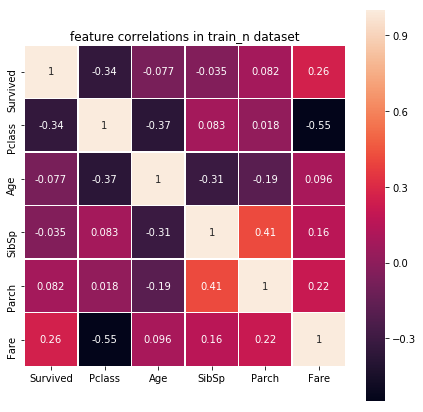

In [6]:
sml.plot.correlate()

## Outliers Detection and Fix

We can use distributions to understand skew (left/right) for determining outliers.

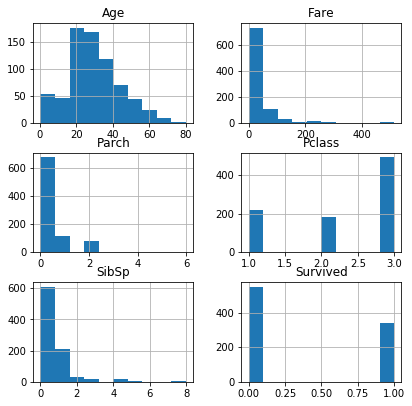

In [7]:
sml.plot.distribute()

Continuous or high-cardinality numerical features are better plotted using scatter plot for determining outliers.

We do not expect outliers in case of Age feature as the distribution plot is fairly close to normal (rising in the middle of x-axis and falling on either sides evenly).

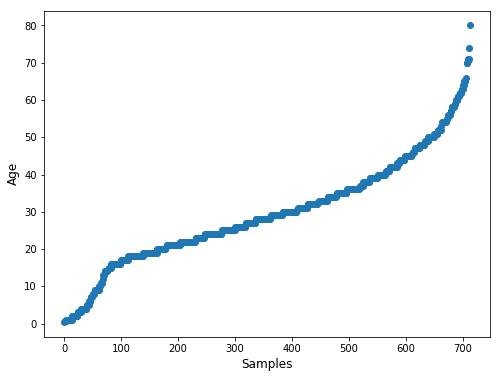

In [8]:
sml.plot.continuous('Age')

The method clearly shows some outliers in case of Fare feature. This coincides with our observation from the distribution plot for the Fare feature which is skewed towards left.

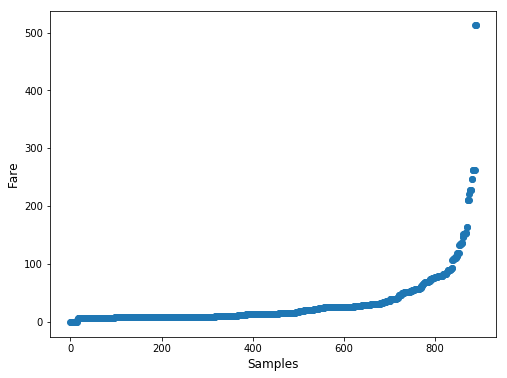

In [9]:
sml.plot.continuous('Fare')

To correct the outliers we fix only values in upper range of the 99th percentile. As the results show these constitute around 1% of overall samples.

In [10]:
sml.feature.outliers('Fare', upper=99)

'Fixed 9 or 1.01% upper outliers. '

While we impact only a few samples, the outliers fix is fairly significant as shown by the same plot after the fix.

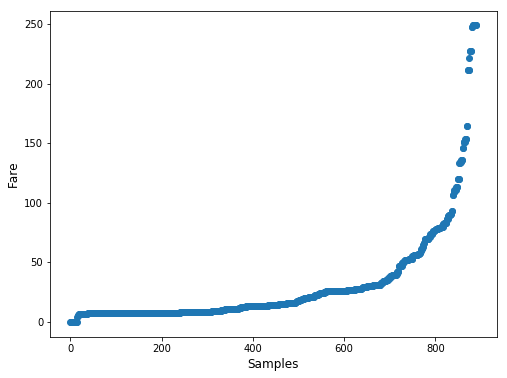

In [11]:
sml.plot.continuous('Fare')

We throw-in another plot into the mix just to understand how the remaining (potential) outliers are spread across when correlating with seemingly related features. We know that the passenger class and fare paid may be significantly correlated. As the plot points in upper range mostly stick to Pclass=1 we can safely assume no further fixing is required for the Fare feature.

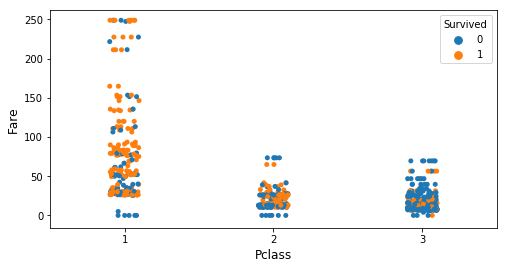

In [12]:
sml.plot.strip('Pclass', 'Fare')

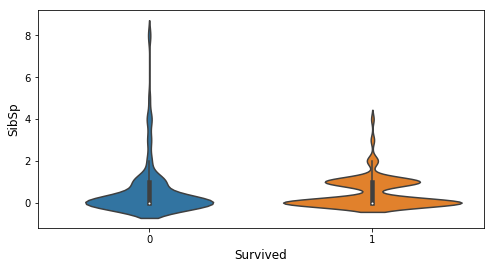

Fixed 7 or 0.79% upper outliers. 


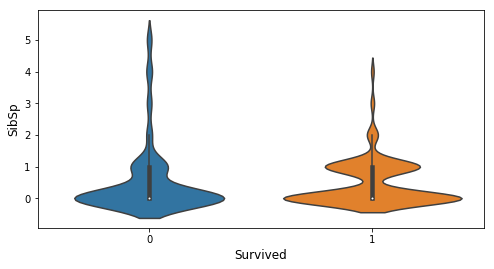

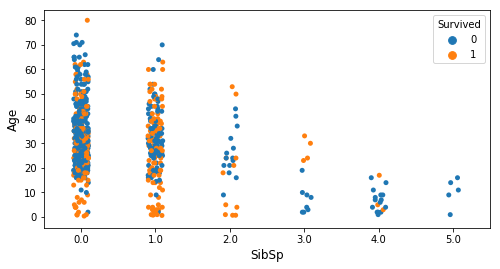

In [13]:
sml.plot.ordinal('SibSp')
print(sml.feature.outliers('SibSp', upper=99))
sml.plot.ordinal('SibSp')
sml.plot.strip('SibSp', 'Age')

## Feature Engineering For High-Cardinality

High-cardinality features like Ticket and Age are candidates for feature engineering. We use the density method to create a new feature based on Age and Ticket and drop the Ticket feature in turn. This simple iteration improves our model significantly and helps us jump 100s of positions on the Kaggle leaderboard.

In [14]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Nulls,1014,Use feature.impute.
Outliers Upper,[Fare],Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (891, 11) | test (418, 10)",
Numerical Ratio,54%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Survived, Pclass, SibSp, Parch]",Use plot.ordinal.
Text High-cardinality,"[Cabin, Ticket]",(>10) categories. Use feature.labels.
Text Categorical,"[Embarked, Sex]",Use feature.labels or feature.mapping.
Text Unique,[Name],~80% unique. Use feature.extract or feature.drop.


In [15]:
sml.feature.density('Age')
sml.train[['Age', 'Age_density']].head()

,Age,Age_density
0,22.0,27
1,38.0,11
2,26.0,18
3,35.0,18
4,35.0,18


In [16]:
sml.feature.density('Ticket')
sml.train[['Ticket', 'Ticket_density']].head()

,Ticket,Ticket_density
0,A/5 21171,1
1,PC 17599,1
2,STON/O2. 3101282,1
3,113803,2
4,373450,1


In [17]:
sml.feature.drop(['Ticket'])

'Dropped 1 features with 12 features available.'

## Extracting New Features

We will now extract new features Deck from Cabin and FamilySize from Parch and SibSp.

In [18]:
sml.plot.crosstab('Survived', 'SibSp')

SibSp,0.0,1.0,2.0,3.0,4.0,5.0
Survived,,,,,,
0,398,97,15,12,15,12
1,210,112,13,4,3,0


In [19]:
sml.plot.crosstab('Survived', 'Parch')

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


In [20]:
sml.feature.fillna(a='Cabin', new='Z')
sml.feature.extract(new='Deck', a='Cabin', regex='([A-Z]){1}')
sml.feature.drop(['Cabin'])
sml.feature.mapping('Sex', {'male': 0, 'female': 1})
sml.feature.sum(new='FamilySize', a='Parch', b='SibSp')
sml.feature.add('FamilySize', 1)

'Filled 1014 null values across test and train datasets.'

'Dropped 1 features with 12 features available.'

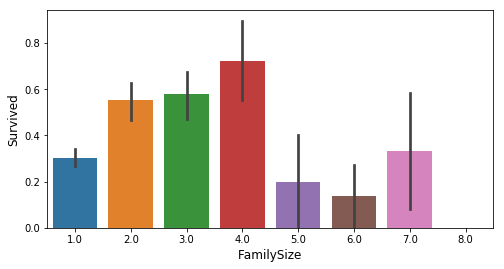

In [21]:
sml.plot.bar('FamilySize', 'Survived')

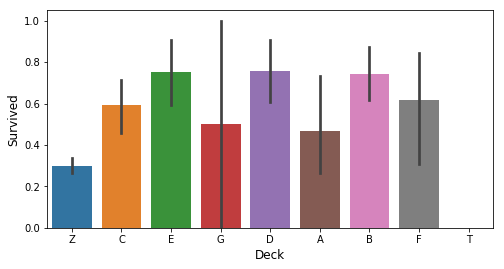

In [22]:
sml.plot.bar('Deck', 'Survived')

In [23]:
sml.feature.drop(['Parch', 'SibSp'])

'Dropped 2 features with 11 features available.'

Here is a single line of code to impute all empty features values (numerical and text) with numerical median or most common text value.

In [24]:
sml.feature.impute()

'Imputed 179 empty values to 0.'

In [25]:
sml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
Age               891 non-null float64
Age_density       891 non-null int64
Deck              891 non-null object
Embarked          891 non-null object
FamilySize        891 non-null float64
Fare              891 non-null float64
Name              891 non-null object
Pclass            891 non-null int64
Sex               891 non-null int64
Survived          891 non-null int64
Ticket_density    891 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 83.5+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
Age               418 non-null float64
Age_density       418 non-null int64
Deck              418 non-null object
Embarked          418 non-null object
FamilySize        418 non-null float64
Fare              418 non-null float64
Name              418 non-null object
Pc

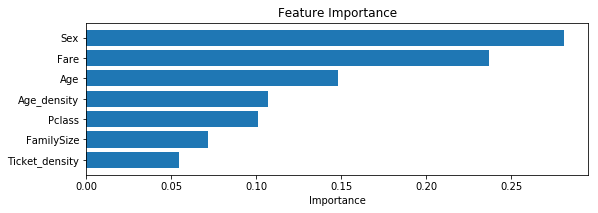

In [26]:
sml.plot.importance()

In [27]:
sml.train.head()

,Age,Age_density,Deck,Embarked,FamilySize,Fare,Name,Pclass,Sex,Survived,Ticket_density
0,22.0,27,Z,S,2.0,7.2500,"Braund, Mr. Owen Harris",3,0,0,1
1,38.0,11,C,C,2.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,1
2,26.0,18,Z,S,1.0,7.9250,"Heikkinen, Miss. Laina",3,1,1,1
3,35.0,18,C,S,2.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,2
4,35.0,18,Z,S,1.0,8.0500,"Allen, Mr. William Henry",3,0,0,1


In [28]:
sml.feature.extract(new='Title', a='Name', regex=' ([A-Za-z]+)\.')
sml.plot.crosstab('Title', 'Sex')

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [29]:
sml.feature.replace(a='Title', match=['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], new='Rare')
sml.feature.replace('Title', 'Mlle', 'Miss')
sml.feature.replace('Title', 'Ms', 'Miss')
sml.feature.replace('Title', 'Mme', 'Mrs')

'Replaced matching list of strings across train and test datasets.'

'Replaced 2 matching values across train and test datasets.'

'Replaced 2 matching values across train and test datasets.'

'Replaced 1 matching values across train and test datasets.'

In [30]:
sml.train[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [31]:
sml.feature.drop(['Name'])
sml.feature.labels(['Title', 'Embarked', 'Deck'])
sml.train.head()

'Dropped 1 features with 11 features available.'

,Age,Age_density,Deck,Embarked,FamilySize,Fare,Pclass,Sex,Survived,Ticket_density,Title
0,22.0,27,8,2,2.0,7.2500,3,0,0,1,2
1,38.0,11,2,0,2.0,71.2833,1,1,1,1,3
2,26.0,18,8,2,1.0,7.9250,3,1,1,1,1
3,35.0,18,2,2,2.0,53.1000,1,1,1,2,3
4,35.0,18,8,2,1.0,8.0500,3,0,0,1,2


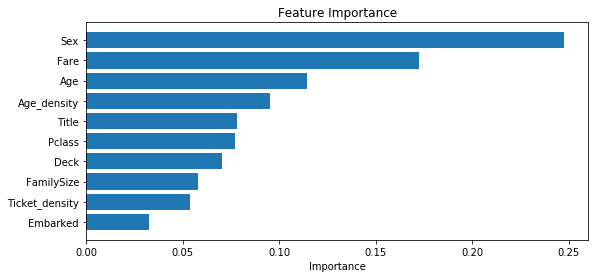

In [32]:
sml.plot.importance()

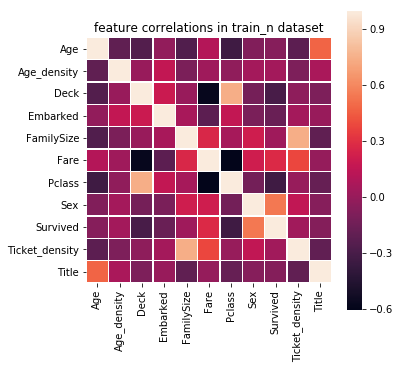

In [33]:
sml.plot.correlate()

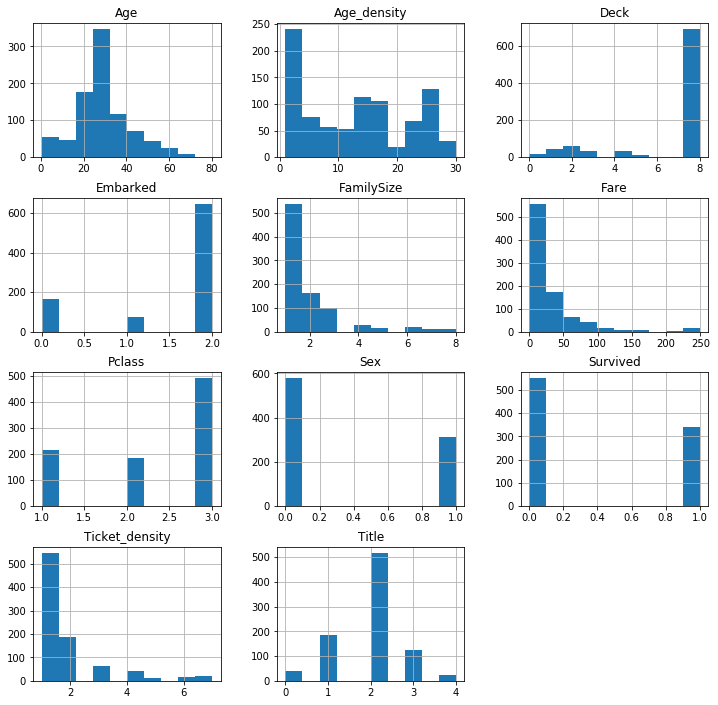

In [34]:
sml.plot.distribute()

In [35]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Outliers Upper,[Fare],Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (891, 11) | test (418, 10)",
Numerical High-cardinality,"[Age, Age_density, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Deck, Embarked, FamilySize, Pclass, Sex, Surv...",Use plot.ordinal.
Target Analysis (Survived),Model ready.,Use classification models.


In [36]:
sml.model.data()

'train_X: (891, 10) train_y: (891,) test_X: (418, 10)'

## Hyper-parameters Tuning

This is an important step in the workflow. We optimize the hyper-parameters used for our XGBoost classifier to get the best results. We do this iteratively by setting certain hyper-parameters as fixed while checking permutations for two select parameters at a time.

The resulting table ranks the permutations based on accuracy, highest rank = 1.

We now substitute the highest ranking parameters as fixed in the next round of optimization, selecting an alternate pair of parameters to optimize this time. Repeat this process for as many parameters as required. Normally two rounds of tuning is sufficient.

In [37]:
select_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
fixed_params = {'learning_rate':0.1, 'subsample':0.8, 
                'colsample_bytree':0.8, 'seed':0, 
                'objective': 'binary:logistic'}

sml.xgb.hyper(select_params, fixed_params)

,rank,params
4,1,"{'max_depth': 5, 'min_child_weight': 3}"
0,2,"{'max_depth': 3, 'min_child_weight': 1}"
8,2,"{'max_depth': 7, 'min_child_weight': 5}"
5,4,"{'max_depth': 5, 'min_child_weight': 5}"
1,5,"{'max_depth': 3, 'min_child_weight': 3}"
7,6,"{'max_depth': 7, 'min_child_weight': 3}"
3,7,"{'max_depth': 5, 'min_child_weight': 1}"
2,8,"{'max_depth': 3, 'min_child_weight': 5}"
6,8,"{'max_depth': 7, 'min_child_weight': 1}"


In [38]:
select_params = {'learning_rate': [0.3, 0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
fixed_params = {'max_depth':3, 'min_child_weight':1, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective':'binary:logistic'}

sml.xgb.hyper(select_params, fixed_params)

,rank,params
3,1,"{'learning_rate': 0.1, 'subsample': 0.7}"
4,2,"{'learning_rate': 0.1, 'subsample': 0.8}"
1,3,"{'learning_rate': 0.3, 'subsample': 0.8}"
2,4,"{'learning_rate': 0.3, 'subsample': 0.9}"
5,5,"{'learning_rate': 0.1, 'subsample': 0.9}"
0,6,"{'learning_rate': 0.3, 'subsample': 0.7}"
7,7,"{'learning_rate': 0.01, 'subsample': 0.8}"
6,8,"{'learning_rate': 0.01, 'subsample': 0.7}"
8,8,"{'learning_rate': 0.01, 'subsample': 0.9}"


In [39]:
tuned_params = {'learning_rate': 0.1, 'subsample':0.8, 
                'max_depth':3, 'min_child_weight':1,
                'seed':0, 'colsample_bytree':0.8, 
                'objective':'binary:logistic'}
sml.xgb.cv(tuned_params)

In [40]:
sml.xgb.cv_results.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
59,0.168539,0.009401,0.122753,0.006192
60,0.165168,0.010420,0.121629,0.005660
61,0.166292,0.010420,0.119944,0.006742
62,0.165168,0.009795,0.121349,0.004750
63,0.164045,0.011997,0.120225,0.005660


In [41]:
tuned_params['n_estimators'] = sml.xgb.cv_results.shape[0] - 1
sml.xgb.params(tuned_params)

## Model Evaluation and Prediction

We can now evaluate various models against our datasets to see which one is best suited.

In [42]:
sml.xgb.classifier()

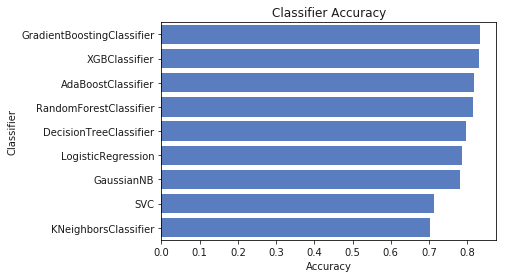

In [43]:
sml.model.evaluate()
sml.plot.model_ranks()

In [44]:
sml.model.ranks()

,Classifier,Accuracy
0,GradientBoostingClassifier,0.834444
0,XGBClassifier,0.832222
0,AdaBoostClassifier,0.816667
0,RandomForestClassifier,0.814444
0,DecisionTreeClassifier,0.797778
0,LogisticRegression,0.787778
0,GaussianNB,0.780000
0,SVC,0.712222
0,KNeighborsClassifier,0.703333


## Model Prediction and Feature Selection

This part of our notebook trains the XGBoost model, generates the model predictions and plots features based on model assigned importance (weights).

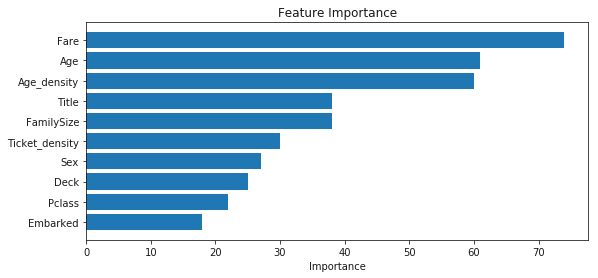

In [45]:
sml.xgb.fit()
sml.xgb.predict()

sml.plot.xgb_importance()

In [46]:
sml.xgb.feature_selection()

Accuracy: 79.480000%
Thresh=0.033, n=10, Accuracy: 79.48%
Thresh=0.035, n=9, Accuracy: 79.10%
Thresh=0.060, n=8, Accuracy: 77.24%
Thresh=0.066, n=7, Accuracy: 77.24%
Thresh=0.068, n=6, Accuracy: 76.12%
Thresh=0.081, n=5, Accuracy: 76.12%
Thresh=0.086, n=4, Accuracy: 68.28%
Thresh=0.101, n=3, Accuracy: 69.03%
Thresh=0.167, n=2, Accuracy: 69.40%
Thresh=0.304, n=1, Accuracy: 69.40%


In [47]:
sml.xgb.sample_accuracy()

'Accuracy = 87.43%. Found 779 correct of 891 total labels'

In [48]:
sml.save_results(
    columns={ 'PassengerId': sml.uid,
             'Survived': sml.xgb.predictions }, 
    file_path='../output/titanic-speedml-{}.csv'.format(sml.slug()))
sml.slug()

'Results saved.'

'e16.40-m83.22-s87.43-f79.48'